In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
statistics = pd.DataFrame()
for i in range (2016, 2019, 1):
    foldername = "Parsed_" + str(i) + "_" + str(i+1)[2:] + "/gwgames/"
    for j in range(1,39,1):
        filename = "gw" + str(j) + ".csv"
        statistics = statistics.append(pd.read_csv(foldername + filename))
statistics

,name,attempted_passes,big_chances_created,big_chances_missed,clearances_blocks_interceptions,completed_passes,dribbles,errors_leading_to_goal_attempt,fixture,fouls,...,red_cards,round,saves,tackled,tackles,target_missed,team_score,was_home,yellow_cards,shots_on_target
0,West Ham United,351,0,0,49,262,3,0,10,16,...,0,1,4,19,18,2,1,0,2,3
1,Everton,357,0,1,61,261,8,0,3,10,...,0,1,3,16,16,4,1,1,0,6
2,Arsenal,485,0,1,36,385,8,0,8,13,...,0,1,3,23,8,3,3,1,3,5
3,Watford,303,0,0,51,194,8,0,7,12,...,1,1,6,13,15,4,1,0,2,1
4,Chelsea,559,0,0,19,481,16,0,10,16,...,0,1,2,26,10,6,2,1,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Cardiff City,225,1,0,38,131,7,0,377,6,...,0,38,10,16,7,6,2,0,3,4
16,Tottenham,540,0,0,31,449,7,0,379,10,...,0,38,7,19,8,5,2,1,0,3
17,Brighton,245,1,0,55,176,4,1,371,12,...,0,38,5,15,3,3,1,1,0,2
18,Newcastle United,359,2,1,55,282,4,0,374,8,...,0,38,2,12,4,6,4,0,0,6


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score



y = statistics["team_score"]#print(y)
X = statistics.drop(columns=["team_score", "name"], axis=1)

X_train = X[:(len(X)//3)*2]
y_train = y[:(len(y)//3)*2].to_frame()
#print(y_train)

X_test = X[(len(X)//3)*2:]
y_test = y[(len(X)//3)*2:].to_frame()
#print(y_test)

model1 = LinearRegression(normalize=True)
model2 = Lasso()
model3 = Ridge()

model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
print("Liner:" + str(r2_score(y_test, pred1)))
print(pred1)

model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
print("Lasso:" + str(r2_score(y_test, pred2)))
print(pred2)
      
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
print("Ridge:" + str(r2_score(y_test, pred3)))
print(pred3)

first = [r2_score(y_test, pred1), r2_score(y_test, pred2), r2_score(y_test, pred3)]

Liner:0.5341484873445584
[[ 7.68912234e-01]
 [ 1.19107242e+00]
 [ 5.26848648e-01]
 [ 3.10591499e-01]
 [ 2.93197245e+00]
 [ 1.39561776e+00]
 [ 1.56886151e+00]
 [ 1.98124431e+00]
 [ 3.36475772e+00]
 [ 2.40070535e+00]
 [ 1.92002303e+00]
 [ 1.06068653e+00]
 [ 2.18976449e+00]
 [ 4.36193147e-01]
 [ 1.09576727e-01]
 [ 4.52537290e-02]
 [ 1.82117171e+00]
 [ 1.30266780e+00]
 [ 1.43494613e+00]
 [ 2.05624982e+00]
 [ 1.36071202e+00]
 [ 1.32374431e+00]
 [ 8.16418370e-01]
 [ 1.98861884e+00]
 [ 8.18662120e-01]
 [ 1.38903352e+00]
 [ 1.59023604e+00]
 [-1.22515370e-01]
 [ 2.43386707e+00]
 [ 1.88572042e+00]
 [ 3.00239059e+00]
 [ 1.36058585e+00]
 [ 1.23348718e+00]
 [ 8.62536049e-01]
 [-1.04372629e-01]
 [ 1.64539294e+00]
 [ 3.66587514e+00]
 [ 4.57328676e+00]
 [ 1.34069796e+00]
 [ 2.78564202e+00]
 [ 1.16578363e+00]
 [ 6.33141429e-01]
 [ 3.54555178e-01]
 [ 4.36627474e+00]
 [ 1.32297333e-01]
 [ 5.59549520e-01]
 [ 4.26439299e+00]
 [ 5.22216169e-01]
 [ 1.89895572e+00]
 [ 1.39363269e+00]
 [ 6.55471015e-01]
 [ 1.8

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

#Method taken from HW07
def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=3, random_state = 0, shuffle=False)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, test_indexes in kf.split(X):
            X_test, X_val = X.values[train_indexes], X.values[test_indexes]
            y_test, y_val = y.values[train_indexes], y.values[test_indexes]

            model.fit(X_test, y_test)
            mse = mean_squared_error(y_val,model.predict(X_val))
            results.append((alpha, mse))
   

    best_alpha, mse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, mse

In [5]:

ridge_alphas = np.linspace(0.01, 10, 1000)
lasso_alphas = np.linspace(0.001, 5, 1000)

print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), X_train, y_train, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), X_train, y_train, lasso_alphas))

Ridge best alpha 0.0100 - Avg MSE 0.5955 


C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2171800048878367, tolerance: 0.16788904244817376
  positive)
C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.74507172957107, tolerance: 0.15971530108588355
  positive)
C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.924940719115625, tolerance: 0.16918431952662727
  positive)
C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

Lasso best alpha 0.0010 - Avg MSE 0.5962 


In [6]:
bestLasso = Lasso(alpha=0.001)
bestRidge = Ridge(alpha=0.01)

bestLasso.fit(X_train, y_train)
pred2 = bestLasso.predict(X_test)
print("Lasso:" + str(r2_score(y_test, pred2)))
print(pred2)
      
bestRidge.fit(X_train, y_train)
pred3 = bestRidge.predict(X_test)
print("Ridge:" + str(r2_score(y_test, pred3)))
print(pred3)

Lasso:0.5343148656102173
[ 7.73646093e-01  1.20078769e+00  5.04663462e-01  3.16516213e-01
  2.93640660e+00  1.39715233e+00  1.57258383e+00  1.97135051e+00
  3.36143656e+00  2.36131663e+00  1.94097637e+00  1.04474588e+00
  2.18489945e+00  4.33508331e-01  1.50050911e-01  4.73286611e-02
  1.82301614e+00  1.31274855e+00  1.42121698e+00  2.05515785e+00
  1.36602401e+00  1.31754796e+00  8.14205212e-01  1.98752521e+00
  8.14073534e-01  1.39996499e+00  1.57791732e+00 -1.13912602e-01
  2.43376871e+00  1.86604892e+00  2.99325901e+00  1.37646163e+00
  1.21060438e+00  8.69505419e-01 -6.37104715e-02  1.61138141e+00
  3.66270168e+00  4.57805041e+00  1.33346572e+00  2.79078796e+00
  1.17381875e+00  6.34032780e-01  3.68924164e-01  4.35872337e+00
  1.45463621e-01  5.70728934e-01  4.26132252e+00  5.19294331e-01
  1.90374990e+00  1.41704441e+00  6.58290504e-01  1.81520556e+00
  2.85098712e-01  1.40066934e+00  1.14812343e+00  6.51926568e-01
  1.55808354e+00  2.38159421e+00  7.05496475e-01  1.52032538e+00


C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.63346590960532, tolerance: 0.2484207894736842
  positive)


In [7]:
teststatistics = X_test
testlabels = y_test

In [8]:
predictions = pd.DataFrame(columns=["fixture", "home_predict", "away_predict", "home_actual", "away_actual"])
for i in range(teststatistics.shape[0]):
    if int(teststatistics["was_home"].iloc[i]) == 1:
        fixture = int(teststatistics["fixture"].iloc[i])
        home_predict = pred3[i]
        home_actual = int(testlabels.iloc[i])
        away_predict = -1
        away_actual = -1
        for j in range(teststatistics.shape[0]):
            if fixture == int(teststatistics["fixture"].iloc[j]) and int(teststatistics["was_home"].iloc[j]) == 0:
                away_predict = pred3[j]
                away_actual = int(testlabels.iloc[j])
                break
        predictions = predictions.append({"fixture": int(fixture),
                                          "home_predict": float(home_predict),
                                          "away_predict": float(away_predict),
                                          "home_actual": home_actual,
                                          "away_actual": away_actual}, ignore_index=True)
        
predictions["actual_result"] = -1
for i in range(predictions.shape[0]):
    if predictions["home_actual"].iloc[i] > predictions["away_actual"].iloc[i]:
        predictions["actual_result"].loc[i] = 1
    elif predictions["home_actual"].iloc[i] < predictions["away_actual"].iloc[i]:
        predictions["actual_result"].loc[i] = 2
    else:
        predictions["actual_result"].loc[i] = 0
pd.set_option('display.max_rows', 100)
predictions.drop(columns=["home_actual", "away_actual"])

C:\Users\Rasmus\Miniconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,fixture,home_predict,away_predict,actual_result
0,4.0,0.526833,1.821169,2
1,1.0,0.310609,1.302704,2
2,9.0,1.395622,0.045254,1
3,3.0,1.568867,2.931973,2
4,10.0,1.981231,1.920034,0
...,...,...,...,...
375,375.0,1.294695,0.988626,0
376,377.0,2.864714,1.459499,2
377,378.0,0.712475,0.544922,0
378,379.0,1.014351,1.542945,0


In [9]:
pred = predictions.copy(deep=True)
right = 0
all = pred.shape[0]
for idx, row in pred.iterrows():
    home = pred.loc[idx,'home_predict']
    away = pred.loc[idx,'away_predict']
    actual = pred.loc[idx,'actual_result']
    #print(home, away, actual)
    if (abs(home - away) <= 0.5 and actual == 0) or ((away - home) > 0.5 and actual == 2) or ((home-away) > 0.5 and actual == 1):
        right += 1

right/all

0.6736842105263158

In [10]:
gamestats = pd.DataFrame(columns=['name_h','attempted_passes_h','big_chances_created_h','big_chances_missed_h','clearances_blocks_interceptions_h','completed_passes_h','dribbles_h','errors_leading_to_goal_attempt_h','fixture_h','fouls_h','key_passes_h','minutes_h','offside_h','open_play_crosses_h','opponent_team_h','penalties_conceded_h','penalties_missed_h','penalties_saved_h','recoveries_h','red_cards_h','round_h','saves_h','tackled_h','tackles_h','target_missed_h','team_score_h','yellow_cards_h','shots_on_target_h','name_a','attempted_passes_a','big_chances_created_a','big_chances_missed_a','clearances_blocks_interceptions_a','completed_passes_a','dribbles_a','errors_leading_to_goal_attempt_a','fouls_a','key_passes_a','offside_a','open_play_crosses_a','penalties_conceded_a','penalties_missed_a','penalties_saved_a','recoveries_a','red_cards_a','saves_a','tackled_a','tackles_a','target_missed_a','team_score_a','yellow_cards_a','shots_on_target_a'])
gametest = pd.DataFrame(columns=['name_h','attempted_passes_h','big_chances_created_h','big_chances_missed_h','clearances_blocks_interceptions_h','completed_passes_h','dribbles_h','errors_leading_to_goal_attempt_h','fixture_h','fouls_h','key_passes_h','minutes_h','offside_h','open_play_crosses_h','opponent_team_h','penalties_conceded_h','penalties_missed_h','penalties_saved_h','recoveries_h','red_cards_h','round_h','saves_h','tackled_h','tackles_h','target_missed_h','team_score_h','yellow_cards_h','shots_on_target_h','name_a','attempted_passes_a','big_chances_created_a','big_chances_missed_a','clearances_blocks_interceptions_a','completed_passes_a','dribbles_a','errors_leading_to_goal_attempt_a','fouls_a','key_passes_a','offside_a','open_play_crosses_a','penalties_conceded_a','penalties_missed_a','penalties_saved_a','recoveries_a','red_cards_a','saves_a','tackled_a','tackles_a','target_missed_a','team_score_a','yellow_cards_a','shots_on_target_a'])
seasonstart = [16, 17, 18]
for i in seasonstart:
    for j in range(38):
        statsgw = pd.read_csv("Parsed_20" + str(i) + "_" + str(i+1) + "/gwgamesStats/gw" + str(j+1) + ".csv")
        statsgw["season"] = i
        if i == 18:
            gametest = gametest.append(statsgw, ignore_index=True)
        else:
            gamestats = gamestats.append(statsgw, ignore_index=True)
#stats = pd.read_csv("Parsed_2016_17/gwgames/gw1.csv")
gamestats = gamestats.drop(columns=["minutes_h", "opponent_team_h", 'penalties_conceded_h', 'penalties_conceded_a'])
gametest = gametest.drop(columns=["minutes_h", "opponent_team_h", 'penalties_conceded_h', 'penalties_conceded_a'])
pd.set_option('display.max_columns', 55)
gametest.head()

C:\Users\Rasmus\Miniconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,attempted_passes_a,attempted_passes_h,big_chances_created_a,big_chances_created_h,big_chances_missed_a,big_chances_missed_h,clearances_blocks_interceptions_a,clearances_blocks_interceptions_h,completed_passes_a,completed_passes_h,dribbles_a,dribbles_h,errors_leading_to_goal_attempt_a,errors_leading_to_goal_attempt_h,fixture_h,fouls_a,fouls_h,key_passes_a,key_passes_h,name_a,name_h,offside_a,offside_h,open_play_crosses_a,open_play_crosses_h,penalties_missed_a,penalties_missed_h,penalties_saved_a,penalties_saved_h,recoveries_a,recoveries_h,red_cards_a,red_cards_h,round_h,saves_a,saves_h,season,shots_on_target_a,shots_on_target_h,tackled_a,tackled_h,tackles_a,tackles_h,target_missed_a,target_missed_h,team_score_a,team_score_h,yellow_cards_a,yellow_cards_h
0,659,370,2,1,1,1,31,35,582,279,20,7,0,0,4,8,9,9,5,Chelsea,Huddersfield Town,1,2,3,4,0,0,0,0,60,72,0,0,1,1,1,18.0,4,1,27,12,6,17,3,4,3,0,1,2
1,553,399,0,0,2,1,24,40,467,319,11,6,1,1,1,14,11,9,9,Manchester City,Arsenal,2,7,0,1,0,0,0,0,59,64,0,0,1,3,6,18.0,8,3,22,6,5,9,5,4,2,0,2,2
2,389,438,0,2,0,2,47,22,299,330,10,11,0,0,9,16,10,5,13,Brighton,Watford,3,0,3,4,0,0,0,0,69,75,0,0,1,3,0,18.0,0,5,17,18,8,9,5,9,0,2,2,2
3,352,670,2,0,1,0,49,36,259,589,14,9,0,0,3,11,9,8,10,Crystal Palace,Fulham,3,2,2,6,0,0,0,0,67,67,0,0,1,6,7,18.0,9,6,24,18,10,17,0,4,2,0,2,1
4,410,547,1,2,0,1,40,33,305,454,3,11,0,1,10,7,8,4,5,Everton,Wolves,3,2,1,5,0,0,0,0,50,55,1,0,1,2,3,18.0,5,4,12,22,9,5,1,5,2,2,1,0


In [11]:
allnames = pd.DataFrame({"name":gamestats["name_h"].append(gametest["name_h"]),
                          "teamid":0})
allnames["name"] = pd.Categorical(allnames["name"])
allnames["teamid"] = allnames.name.cat.codes
names = {}
for index, row in allnames.iterrows():
    if not row["name"] in names.keys():
        names[row["name"]] = row["teamid"]

gamestats["teamid_h"] = -1
gamestats["teamid_a"] = -1
for i in range(gamestats.shape[0]):
    gamestats['teamid_h'].loc[i] = int(names.get(gamestats["name_h"].iloc[i]))
    gamestats['teamid_a'].loc[i] = int(names.get(gamestats["name_a"].iloc[i]))
    
gametest["teamid_h"] = -1
gametest["teamid_a"] = -1
for i in range(gametest.shape[0]):
    gametest["teamid_h"].loc[i] = int(names.get(gametest["name_h"].iloc[i]))
    gametest["teamid_a"].loc[i] = int(names.get(gametest["name_a"].iloc[i]))

#for index, row in test.iterrows():
#    row["teamid"] = names.get(row["name"])
gamestats = gamestats.drop(columns=["name_h", "name_a"])
gametest = gametest.drop(columns=["name_h", "name_a"])
#stats.head()

In [12]:
trainfeatures = gamestats.drop(columns=["team_score_h", "team_score_a"])
trainlabels = pd.DataFrame()
for i in range(gamestats.shape[0]):
    if int(gamestats["team_score_h"].iloc[i]) < int(gamestats["team_score_a"].iloc[i]):
        trainlabels = trainlabels.append([2], ignore_index=True)
    elif int(gamestats["team_score_h"].iloc[i]) == int(gamestats["team_score_a"].iloc[i]):
        trainlabels = trainlabels.append([0], ignore_index=True)
    elif int(gamestats["team_score_h"].iloc[i]) > int(gamestats["team_score_a"].iloc[i]):
        trainlabels = trainlabels.append([1], ignore_index=True)
trainlabels

,0
0,0
1,2
2,1
3,1
4,0
...,...
755,1
756,1
757,2
758,2


In [13]:
testfeatures = gametest.drop(columns=["team_score_h", "team_score_a"])
testlabels = pd.DataFrame()
for i in range(gametest.shape[0]):
    if int(gametest["team_score_h"].iloc[i]) < int(gametest["team_score_a"].iloc[i]):
        testlabels = testlabels.append([2], ignore_index=True)
    elif int(gametest["team_score_h"].iloc[i]) == int(gametest["team_score_a"].iloc[i]):
        testlabels = testlabels.append([0], ignore_index=True)
    elif int(gametest["team_score_h"].iloc[i]) > int(gametest["team_score_a"].iloc[i]):
        testlabels = testlabels.append([1], ignore_index=True)
testlabels

,0
0,2
1,2
2,1
3,2
4,0
...,...
375,0
376,2
377,0
378,0


In [14]:
trainlabels

,0
0,0
1,2
2,1
3,1
4,0
...,...
755,1
756,1
757,2
758,2


In [15]:
newtrainlabels = pd.DataFrame()
newtestlabels = pd.DataFrame()

for idx, row in trainlabels.iterrows():
    if int(trainlabels.loc[idx]) == 1:
        newtrainlabels = newtrainlabels.append([0], ignore_index=True)
    elif int(trainlabels.iloc[idx]) == 2:
        newtrainlabels = newtrainlabels.append([2], ignore_index=True)
    elif int(trainlabels.iloc[idx]) == 0:
        newtrainlabels = newtrainlabels.append([1], ignore_index=True)
        

for idx, row in testlabels.iterrows():
    if int(testlabels.iloc[idx]) == 1:
        newtestlabels = newtestlabels.append([0], ignore_index=True)
    elif int(testlabels.iloc[idx]) == 2:
        newtestlabels = newtestlabels.append([2], ignore_index=True)
    elif int(testlabels.iloc[idx]) == 0:
        newtestlabels = newtestlabels.append([1], ignore_index=True)
newtestlabels.head(30)

,0
0,2
1,2
2,0
3,2
4,1
5,0
6,0
7,0
8,1
9,2


In [16]:
model1 = LinearRegression(normalize=True)
model1.fit(trainfeatures, newtrainlabels)
pred1 = model1.predict(testfeatures)
print("Liner:" + str(r2_score(newtestlabels, pred1)))
print(pred1)

Liner:0.761194028566787
[[ 2.29312186]
 [ 1.64880312]
 [ 0.20319731]
 [ 1.74271357]
 [ 1.20013136]
 [-0.27652195]
 [ 0.27179334]
 [ 0.56913115]
 [ 0.82907016]
 [ 1.31582   ]
 [ 1.43317676]
 [ 1.74210748]
 [ 1.76418417]
 [ 0.53092514]
 [ 0.31798691]
 [ 0.88767512]
 [ 0.84726356]
 [ 0.61309441]
 [-0.9443756 ]
 [ 0.39578399]
 [ 1.16992532]
 [ 0.27101867]
 [ 0.56057882]
 [ 0.18610803]
 [ 0.83063233]
 [ 0.52255325]
 [ 1.30148503]
 [ 2.10451797]
 [ 1.61690528]
 [ 1.45044486]
 [ 1.29494437]
 [ 1.88286893]
 [ 1.59963478]
 [ 0.27285556]
 [ 0.79729935]
 [ 1.47312648]
 [ 1.43408321]
 [ 1.04256782]
 [-0.0124757 ]
 [ 0.5925714 ]
 [ 1.66328589]
 [ 1.37425774]
 [ 0.34692921]
 [ 0.28974395]
 [ 2.02599181]
 [ 0.86373917]
 [-0.09996515]
 [-0.15849709]
 [ 1.6439958 ]
 [ 1.36448066]
 [ 0.80737169]
 [-0.45365662]
 [ 0.18223109]
 [ 1.14154983]
 [ 0.65151579]
 [ 0.04117776]
 [ 0.13478222]
 [ 0.85080271]
 [ 2.93150262]
 [ 1.38492708]
 [ 0.33028892]
 [ 1.81792022]
 [-0.30339935]
 [ 0.31483236]
 [ 0.64876976]
 

In [17]:
ridge_alphas = np.linspace(0.01, 10, 100)
lasso_alphas = np.linspace(0.001, 5, 100)
        
print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), trainfeatures, newtrainlabels, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), trainfeatures, newtrainlabels, lasso_alphas))

Ridge best alpha 10.0000 - Avg MSE 0.1825 


C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.6738894576818, tolerance: 0.03652727272727273
  positive)
C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.866455054444323, tolerance: 0.03596686390532544
  positive)
C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.078504756743108, tolerance: 0.03751992110453649
  positive)
C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Lasso best alpha 0.0010 - Avg MSE 0.1809 


In [18]:
bestLasso = Lasso(alpha=0.001)
bestRidge = Ridge(alpha=10)

bestLasso.fit(trainfeatures, newtrainlabels)
pred2 = bestLasso.predict(testfeatures)
print("Lasso:" + str(r2_score(newtestlabels, pred2)))
print(pred2)
      
bestRidge.fit(trainfeatures, newtrainlabels)
pred3 = bestRidge.predict(testfeatures)
print("Ridge:" + str(r2_score(newtestlabels, pred3)))
print(pred3)

second = [r2_score(newtestlabels, pred1), r2_score(newtestlabels, pred2), r2_score(newtestlabels, pred3)]

Lasso:0.7625521993555848
[ 2.29429970e+00  1.63908097e+00  2.24349625e-01  1.75054641e+00
  1.17895354e+00 -2.55245492e-01  2.91221778e-01  5.73407388e-01
  8.23449111e-01  1.31983923e+00  1.44467746e+00  1.73829878e+00
  1.75477992e+00  5.25814497e-01  2.99779222e-01  7.59945631e-01
  8.53288745e-01  6.07405519e-01 -9.14498336e-01  4.06143418e-01
  1.14994738e+00  2.74113303e-01  5.71752872e-01  1.96751067e-01
  8.49433315e-01  5.27737818e-01  1.26893004e+00  2.09625163e+00
  1.59810952e+00  1.45342472e+00  1.29669433e+00  1.74843509e+00
  1.47997781e+00  2.81065766e-01  8.09148023e-01  1.46212234e+00
  1.42072298e+00  1.07589748e+00  7.97886164e-04  6.09501056e-01
  1.66700026e+00  1.34186610e+00  3.63917983e-01  2.79956438e-01
  2.03652184e+00  8.82470462e-01 -7.88901738e-02 -1.54474451e-01
  1.63209046e+00  1.37381054e+00  8.07963957e-01 -4.24561523e-01
  1.96180244e-01  1.13632360e+00  6.69748200e-01  5.14978583e-02
  1.29805742e-01  8.64966541e-01  2.90843833e+00  1.40109661e+00


C:\Users\Rasmus\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.13580434523176, tolerance: 0.05500934210526316
  positive)


<Figure size 1332x756 with 0 Axes>

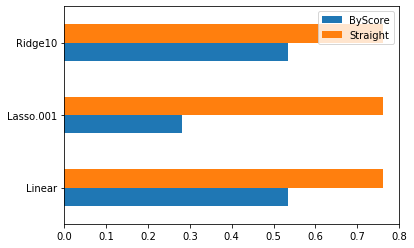

In [29]:

regressions = ["Linear", "Lasso.001", "Ridge10"]

df = pd.DataFrame({"ByScore": first, "Straight": second}, index=regressions)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
pd.concat(
    [df["ByScore"], df["Straight"]],
    axis=1).plot.barh()
plt.savefig("regression.png", dpi=400)

In [22]:
df

,ByScore,Straight
LinearRegression,0.534148,0.761194
Lasso,0.282187,0.762552
Ridge,0.534161,0.761665
